# Семинар 7 ДЗ

## Задача 1

Даны значения величины заработной платы заемщиков банка $(zp)$ и значения их поведенческого кредитного скоринга $(ks)$:

>zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
>
>ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].

Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy

Полученные значения должны быть равны.

Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков, а затем с использованием функций из библиотек numpy и pandas.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

Ковариация – это величина, определяющая зависимость двух случайных величин.

Найти ее можно по формуле:

$cov_{xy}=M(XY)-M (X)*M(Y)$

где $М$ - математическое ожидание

Посчитаем в python смещённую ковариацию

In [8]:
cov = np.mean(zp * ks) - np.mean(zp) * np.mean(ks)
round(cov, 2)

9157.84

Используем встроенную функцию

In [7]:
np.cov(zp, ks, ddof=0)

array([[ 3494.64,  9157.84],
       [ 9157.84, 30468.89]])

Посчитаем в python несмещённую ковариацию по формуле:

$\sigma_{XY}=\dfrac {1}{n-1} \cdot \displaystyle\sum_{i=1}^{n} (x_i - \overline{X})\cdot (y_i - \overline{Y})$

In [28]:
cov = ((zp - zp.mean()) * (ks - ks.mean())).sum() / (len(zp) - 1)
cov

10175.37777777778

In [10]:
np.cov(zp, ks, ddof=1)

array([[ 3882.93333333, 10175.37777778],
       [10175.37777778, 33854.32222222]])

Рассчитаем коэффициент корреляции Пирсона, сначала по формуле, а потом при помощи встроенной функции

In [9]:
cov = np.cov(zp, ks, ddof=1)[0][1]
sigma_zp = np.std(zp, ddof=1)
sigma_ks = np.std(ks, ddof=1)
cor = cov/ (sigma_zp * sigma_ks)
cor, cov, sigma_zp, sigma_ks

(0.887490092073916, 10175.377777777776, 62.31318747531162, 183.99544076477068)

In [13]:
r = np.corrcoef(zp, ks)
r

array([[1.        , 0.88749009],
       [0.88749009, 1.        ]])

<function matplotlib.pyplot.show(close=None, block=None)>

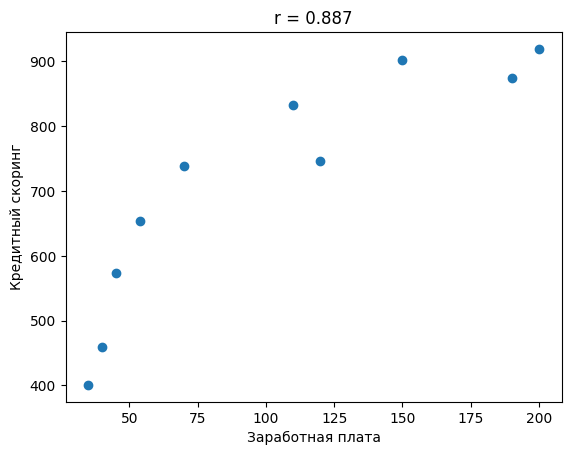

In [16]:
plt.scatter(zp, ks)
plt.title(f"r = {round(r[0][1], 3)}")
plt.xlabel('Заработная плата')
plt.ylabel('Кредитный скоринг')
plt.show

## Задача 2

Измерены значения IQ выборки студентов, обучающихся в местных технических вузах:

$131, 125, 115, 122, 131, 115, 107, 99, 125, 111$.

Известно, что в генеральной совокупности IQ распределен нормально.

Найдите доверительный интервал для математического ожидания с надежностью $0.95$.


## Решение

Для решения этой задачи используем формулу:

$P(\overline X + t_{\frac{α}{2}} \cdot \dfrac{\sigma}{\sqrt{n}} \leq \mu \leq \overline X + t_{1- \frac{α}{2}} \cdot \dfrac{\sigma}{\sqrt{n}}) = p$

Для расчетов используем python

In [12]:
x = np.array([131, 125, 115, 122, 131, 115, 107, 99, 125, 111])

In [17]:
mu = x.mean()
sigma = x.std(ddof=1)
n = len(x)

p = 0.95
alhpa = 1-p

In [18]:
t1 = stats.t.ppf(alhpa/2, df= n - 1)
t2 = stats.t.ppf(1 - alhpa/2, df= n - 1)
t1, t2

(-2.2621571627409915, 2.2621571627409915)

In [21]:
left = round(mu + t1 * sigma / np.sqrt(n), 2)
right = round(mu + t2 * sigma / np.sqrt(n), 2)
left, right

(110.56, 125.64)

$P(110.56 \leq \mu \leq 125.64) = 0.95$

## Задача 3
Известно, что рост футболистов в сборной распределен нормально с дисперсией генеральной совокупности, равной $25$ кв.см. <br>
Объем выборки равен $27$, <br>
среднее выборочное составляет $174.2$. 

Найдите доверительный интервал для математического ожидания с надежностью $0.95$.

## Решение

Для решения этой задачи используем формулу:

$P(\overline X + Z_{\frac{α}{2}} \cdot \dfrac{\sigma}{\sqrt{n}} \leq \mu \leq \overline X + Z_{1- \frac{α}{2}} \cdot \dfrac{\sigma}{\sqrt{n}}) = p$

Для расчетов используем python

In [22]:
sigma = 25 **0.5
p = 0.95
mu = 174.2
n = 27
alhpa = 1 - p

In [23]:
t1 = stats.norm.ppf(alhpa/2)
t2 = stats.norm.ppf(1 - alhpa/2)
t1, t2

(-1.959963984540054, 1.959963984540054)

In [25]:
left = round(mu + t1 * sigma / np.sqrt(n), 2)
right = round( mu + t2 * sigma / np.sqrt(n), 2)
left, right

(172.31, 176.09)

$P(172.31 \leq \mu \leq 176.09) = 0.95$